In [3]:
import pandas as pd
import numpy as np
import json

In [3]:
heart_data = pd.read_csv("heart/heart.csv")

In [4]:
# train 70%, val 10%, test 20%
heart_train = int(1025/10*7)
heart_val = int(1025/10*8)

In [5]:
heart_gpt3_train = heart_data.iloc[0:heart_train, :]
heart_gpt3_valid = heart_data.iloc[heart_train:heart_val, :]
heart_gpt3_test = heart_data.iloc[heart_val:, :]

In [6]:
heart_gpt3_test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
820,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
821,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
822,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
823,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
824,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0


In [7]:
# An old trial in November 2023
def classify_heart_disease(row):
  
    cp = row[2]  # Chest pain type
    thalach = row[7]  # Maximum heart rate achieved
    ca = row[11]  # Number of major vessels colored by fluoroscopy
    
    prediction = 0
    
    # Rule 1
    if cp == 0 and thalach <= 150:
        prediction=0
    # Rule 2
    elif cp == 0 and thalach > 150:
        prediction=1
        # Rule 3
    elif (cp == 1 or cp == 2) and ca < 2:
        prediction=1
        # Rule 4
    elif (cp == 1 or cp == 2) and ca >= 2:
        predictions=0
        # Rule 5
    elif cp == 3:
        predictions=1
    else:
        # If none of the rules match, default to predicting heart disease
        predictions=1
    
    return prediction

In [41]:
test_pred_mod = heart_gpt3_test.apply(classify_heart_disease, axis = 1)
np.mean(test_pred_mod == heart_gpt3_test["target"])

0.6682926829268293

In [ ]:
# New trials in December 2023
# First trial

In [23]:
def predict_heart_disease_1(data):
    
    feature = ['age', 'sex', 'cp', 'thalach', 'exang', 'ca', 'oldpeak', 'thal']
    
    age, sex, cp, thalach, exang, ca, oldpeak, thal = data[feature]
    if age > 45:
        return 1  # Predict disease
    if sex == 0:
        return 1  # Predict disease
    if cp == 0:
        return 1  # Predict disease
    if thalach <= 150:
        return 1  # Predict disease
    if exang == 1:
        return 1  # Predict disease
    if ca > 0:
        return 1  # Predict disease
    if oldpeak > 1.0:
        return 1  # Predict disease
    if thal in [2, 1]:
        return 1  # Predict disease
    
    return 0  # Predict no disease

In [38]:
def predict_heart_disease_1_m(data):
    age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target = data

    # Initial prediction based on existing conditions
    if age > 45:
        return 1  # Predict disease
    if sex == 0:
        return 1  # Predict disease
    if cp == 0:
        return 1  # Predict disease
    if thalach <= 150:
        return 1  # Predict disease
    if exang == 1:
        return 1  # Predict disease
    if ca > 0:
        return 1  # Predict disease
    if oldpeak > 1.0:
        return 1  # Predict disease
    if thal in [2, 1]:
        return 1  # Predict disease

    # Additional Conditions:
    if cp == 2 and thal in [0, 1]:
        return 1  # Predict disease
    if sex == 1 and thal == 0 and cp != 2:
        return 1  # Predict disease
    if age > 50 and trestbps > 140:
        return 1  # Predict disease

    return 0  # Predict no disease


In [24]:
test_pred_mod = heart_gpt3_test.apply(predict_heart_disease_1, axis = 1)
np.mean(test_pred_mod == heart_gpt3_test["target"])

0.4682926829268293

In [39]:
test_pred_mod = heart_gpt3_test.apply(predict_heart_disease_1_m, axis = 1)
np.mean(test_pred_mod == heart_gpt3_test["target"])

0.4682926829268293

In [ ]:
# Second Trial

In [27]:
def predict_heart_disease_2(data):
    
    feature = ['age', 'sex', 'cp', 'thalach']
    age, sex, cp, thalach = data[feature]
    
    # Rule 1: Age-based Classification
    if age <= 45 and sex == 1:
        return 0  # Low risk
    elif age > 45 and sex == 1:
        return 1  # Moderate risk
    elif sex == 0:
        return 0  # Low risk
    
    # Rule 2: Chest Pain Type-based Classification
    if cp in [0, 1]:
        return 0  # Low risk
    elif cp in [2, 3]:
        return 1  # High risk
    
    # Rule 3: Maximum Heart Rate-based Classification
    if thalach <= 150:
        return 0  # Low risk
    else:
        return 1  # High risk

In [21]:
def predict_heart_disease_2_m(data):
    age, sex, cp, thalach = data['age'], data['sex'], data['cp'], data['thalach']
    
    # Rule 1: Age and Gender-based Classification
    if age <= 45 and sex == 1:
        return 0  # Low risk
    elif age > 45 and sex == 1:
        if cp in [0, 1]:
            return 0  # Low risk
        elif cp in [2, 3]:
            if thalach <= 150:
                return 1  # High risk
            else:
                return 0  # Low risk
    elif sex == 0:
        if cp in [0, 1]:
            return 0  # Low risk
        elif cp in [2, 3]:
            if thalach <= 150:
                return 1  # High risk
            else:
                return 0  # Low risk
    
    # Rule 2: Default Classification
    return 0  # Low risk

In [28]:
test_pred_mod = heart_gpt3_test.apply(predict_heart_disease_2, axis = 1)
np.mean(test_pred_mod == heart_gpt3_test["target"])

0.35609756097560974

In [22]:
test_pred_mod = heart_gpt3_test.apply(predict_heart_disease_2_m, axis = 1)
np.mean(test_pred_mod == heart_gpt3_test["target"])

0.5317073170731708

In [ ]:
# Third Trial

In [31]:
def predict_heart_disease_3(row):
    age = row['age']
    sex = row['sex']
    cp = row['cp']
    trestbps = row['trestbps']
    chol = row['chol']
    fbs = row['fbs']
    restecg = row['restecg']
    thalach = row['thalach']
    exang = row['exang']
    oldpeak = row['oldpeak']
    slope = row['slope']
    ca = row['ca']
    thal = row['thal']
    
    # Rule 1: If age is greater than 50, it's more likely to have heart disease
    if age > 50:
        return 1
    
    # Rule 2: If chest pain type (cp) is 0, it's less likely to have heart disease
    if cp == 0:
        return 0
    
    # Rule 3: If thalach (maximum heart rate achieved) is less than 150, it's more likely to have heart disease
    if thalach < 150:
        return 1
    
    # Rule 4: If oldpeak (ST depression induced by exercise relative to rest) is greater than 2, it's more likely to have heart disease
    if oldpeak > 2:
        return 1
    
    # Rule 5: If ca (number of major vessels) is 0, it's less likely to have heart disease
    if ca == 0:
        return 0
    
    # Default: If none of the above rules apply, return 0 (less likely to have heart disease)
    return 0

In [32]:
test_pred_mod = heart_gpt3_test.apply(predict_heart_disease_3, axis = 1)
np.mean(test_pred_mod == heart_gpt3_test["target"])

0.4097560975609756

In [26]:
def predict_heart_disease_3_m(row):
    age = row['age']
    sex = row['sex']
    cp = row['cp']
    trestbps = row['trestbps']
    chol = row['chol']
    fbs = row['fbs']
    restecg = row['restecg']
    thalach = row['thalach']
    exang = row['exang']
    oldpeak = row['oldpeak']
    slope = row['slope']
    ca = row['ca']
    thal = row['thal']
    
    # Rule 1: If age is greater than 60 and thalach is less than 150, it's more likely to have heart disease
    if age > 60 and thalach < 150:
        return 1
    
    # Rule 2: If chest pain type (cp) is 0 or 2, it's less likely to have heart disease
    if cp == 0 or cp == 2:
        return 0
    
    # Rule 3: If thalach (maximum heart rate achieved) is less than 120, it's more likely to have heart disease
    if thalach < 120:
        return 1
    
    # Rule 4: If oldpeak (ST depression induced by exercise relative to rest) is greater than 1.5, it's more likely to have heart disease
    if oldpeak > 1.5:
        return 1
    
    # Rule 5: If ca (number of major vessels) is 0 or 2, it's less likely to have heart disease
    if ca == 0 or ca == 2:
        return 0
    
    # Default: If none of the above rules apply, return 0 (less likely to have heart disease)
    return 0

In [27]:
test_pred_mod = heart_gpt3_test.apply(predict_heart_disease_3_m, axis = 1)
np.mean(test_pred_mod == heart_gpt3_test["target"])

0.4682926829268293

In [ ]:
# Fourth Trial

In [35]:
def predict_heart_disease_4(data):
    feature = ['age', 'sex', 'cp', 'thalach', 'exang', 'ca', 'oldpeak', 'thal']
    
    age, sex, cp, thalach, exang, ca, oldpeak, thal = data[feature]
    # Age Rule
    if age <= 45:
        return 0  # Less likely to have heart disease
    else:
        # Gender Rule
        if sex == 0:
            return 0  # Less likely to have heart disease
        else:
            # Chest Pain Type Rule
            if cp in [0, 2]:
                return 1  # More likely to have heart disease
            else:
                # Maximum Heart Rate Rule
                if thalach > 150:
                    return 0  # Less likely to have heart disease
                else:
                    # Exercise-Induced Angina Rule
                    if exang == 0:
                        return 0  # Less likely to have heart disease
                    else:
                        # ST Depression Rule
                        if oldpeak > 1.0:
                            return 1  # More likely to have heart disease
                        else:
                            # Number of Major Vessels Rule
                            if ca >= 1:
                                return 1  # More likely to have heart disease
                            else:
                                # Thalassemia Rule
                                if thal == 2:
                                    return 1  # More likely to have heart disease
                                else:
                                    return 0  # Less likely to have heart disease

In [34]:
def predict_heart_disease_4_m(data):
    age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, _ = data
    
    # Gender Rule
    if sex == 0:
        return 0  # Less likely to have heart disease
    
    # Age Rule
    if age <= 45:
        return 0  # Less likely to have heart disease
    
    # Chest Pain Type Rule
    if cp in [0, 2]:
        return 1  # More likely to have heart disease
    
    # Maximum Heart Rate Rule
    if thalach > 150:
        return 0  # Less likely to have heart disease
    
    # Exercise-Induced Angina Rule
    if exang == 0:
        return 0  # Less likely to have heart disease
    
    # ST Depression Rule
    if oldpeak > 1.0:
        return 1  # More likely to have heart disease
    
    # Number of Major Vessels Rule
    if ca >= 1:
        return 1  # More likely to have heart disease
    
    # Thalassemia Rule
    if thal == 2:
        return 1  # More likely to have heart disease
    
    return 0  # Default prediction if none of the rules apply


In [36]:
test_pred_mod = heart_gpt3_test.apply(predict_heart_disease_4, axis = 1)
np.mean(test_pred_mod == heart_gpt3_test["target"])

0.33658536585365856

In [35]:
test_pred_mod = heart_gpt3_test.apply(predict_heart_disease_4_m, axis = 1)
np.mean(test_pred_mod == heart_gpt3_test["target"])

0.33658536585365856

In [ ]:
# Fifth Trial

In [37]:
def predict_heart_disease_5(data):
    
    feature = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
    age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal = data[feature]
    if sex == 0:
        return 1  # Rule 1: Female patients tend to have a higher risk of heart disease.
    
    if cp == 0:
        return 0  # Rule 2: Typical angina is associated with a lower risk of heart disease.
    
    if thalach <= 150:
        return 1  # Rule 3: Patients with lower maximum heart rates tend to have a higher risk.
    
    if age > 60 and trestbps > 140:
        return 1  # Rule 4: Older patients with high resting blood pressure are at risk.
    
    if exang == 1:
        return 1  # Rule 5: Exercise-induced angina is a sign of heart disease.
    
    if oldpeak >= 2.0:
        return 1  # Rule 6: High ST depression indicates a higher risk of heart disease.
    
    return 0  # Default prediction: No disease.

In [38]:
test_pred_mod = heart_gpt3_test.apply(predict_heart_disease_5, axis = 1)
np.mean(test_pred_mod == heart_gpt3_test["target"])

0.6341463414634146

In [17]:
def predict_heart_disease_5_m(row):
    rules_class_0 = []
    rules_class_1 = []
    
    # Rule 1: Age below 40 is likely to be in class 0 (no disease)
    rules_class_0.append(lambda x: x['age'] < 40)
    
    # Rule 2: Sex = 0 (female) is likely to be in class 1 (disease)
    rules_class_1.append(lambda x: x['sex'] == 0)
    
    # Rule 3: Chest pain type 0 and 2 are likely to be in class 0 (no disease)
    rules_class_0.append(lambda x: x['cp'] in [0, 2])
    
    # Rule 4: Resting blood pressure less than 120 is likely to be in class 0 (no disease)
    rules_class_0.append(lambda x: x['trestbps'] < 120)
    
    # Rule 5: Serum cholestoral less than 200 is likely to be in class 0 (no disease)
    rules_class_0.append(lambda x: x['chol'] < 200)
    
    # Rule 6: Fasting blood sugar <= 120 mg/dl is likely to be in class 0 (no disease)
    rules_class_0.append(lambda x: x['fbs'] == 0)
    
    # Rule 7: Resting electrocardiographic results = 0 is likely to be in class 0 (no disease)
    rules_class_0.append(lambda x: x['restecg'] == 0)
    
    # Rule 8: Maximum heart rate achieved above 160 is likely to be in class 0 (no disease)
    rules_class_0.append(lambda x: x['thalach'] > 160)
    
    # Rule 9: No exercise induced angina is likely to be in class 0 (no disease)
    rules_class_0.append(lambda x: x['exang'] == 0)
    
    # Rule 10: Oldpeak (ST depression induced by exercise relative to rest) below 1.0 is likely to be in class 0 (no disease)
    rules_class_0.append(lambda x: x['oldpeak'] < 1.0)
    
    # Rule 11: Slope of the peak exercise ST segment = 2 is likely to be in class 0 (no disease)
    rules_class_0.append(lambda x: x['slope'] == 2)
    
    # Rule 12: Number of major vessels = 0 is likely to be in class 0 (no disease)
    rules_class_0.append(lambda x: x['ca'] == 0)
    
    # Rule 13: Thal = 2 (reversible defect) is likely to be in class 1 (disease)
    rules_class_1.append(lambda x: x['thal'] == 2)
    
    # Apply the rules to classify the data
   
    prediction_class_0 = all(rule(row) for rule in rules_class_0)
    prediction_class_1 = any(rule(row) for rule in rules_class_1)
        
    if prediction_class_0:
        prediction=0  # Classify as class 0 (no disease)
    elif prediction_class_1:
        prediction=1  # Classify as class 1 (disease)
    else:
        prediction=0  # Default to class 0 if no rules are satisfied
    
    return prediction


In [18]:
test_pred_mod = heart_gpt3_test.apply(predict_heart_disease_5_m, axis = 1)
np.mean(test_pred_mod == heart_gpt3_test["target"])

0.6731707317073171

In [5]:
import matplotlib.pyplot as plt

In [1]:
X = [f"Trial {i}" for i in range(1, 7)]
accu = [66.83,46.83,35.61,40.98,33.66,63.41]
accu_fb = [67.80, 46.83, 53.17, 46.83, 33.66, 67.32]

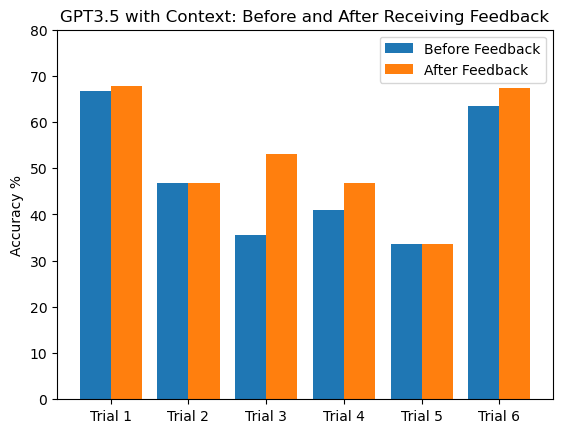

In [8]:
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, accu, 0.4, label = 'Before Feedback') 
plt.bar(X_axis + 0.2, accu_fb, 0.4, label = 'After Feedback') 
  
plt.xticks(X_axis, X) 
#plt.xlabel("") 
plt.ylabel("Accuracy %") 
plt.title("GPT3.5 with Context: Before and After Receiving Feedback") 
plt.ylim(0,80)
plt.legend() 
plt.show() 

In [ ]:
# gpt 4

In [9]:
accu_4 = [48.29, 48.7, 59.3, 35.1, 44.88, 54]
accu_4_fb = [49.9, 51.3, 66.0, 39.6, 44.29, 71]

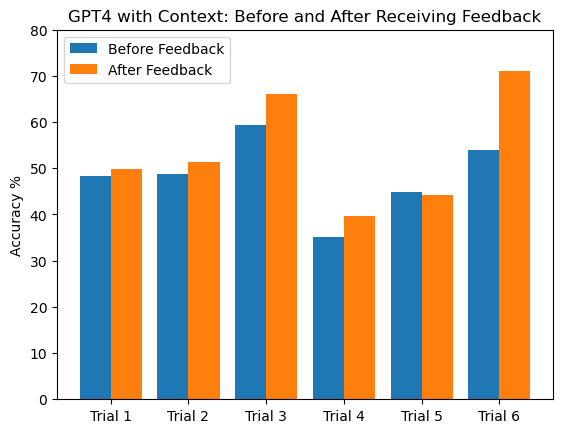

In [10]:
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, accu_4, 0.4, label = 'Before Feedback') 
plt.bar(X_axis + 0.2, accu_4_fb, 0.4, label = 'After Feedback') 
  
plt.xticks(X_axis, X) 
#plt.xlabel("") 
plt.ylabel("Accuracy %") 
plt.title("GPT4 with Context: Before and After Receiving Feedback") 
plt.legend() 
plt.ylim(0,80)
plt.show() 